In [1]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount= True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd   

In [0]:
import os
os.getcwd()
os.chdir('/content/gdrive/My Drive/Colab Notebooks')

In [4]:
# type(df_tweets['date'].iloc[0])

NameError: ignored

In [8]:
import pandas as pd
from datetime import datetime

df_tweets = pd.read_csv('all_tweets_data.csv')
df_tweets = df_tweets[df_tweets['date'].notnull()]
df_tweets['date'] = df_tweets['date'].map(lambda x: datetime.strptime(str(x), '%Y-%m-%d'))

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,4,5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
# df_after_news = df_tweets[df_tweets['date']>'2019-10-27']

In [13]:
df_tweets.isnull().sum()

Unnamed: 0              0
has_media               0
hashtags                0
img_urls                0
is_replied              0
is_reply_to             0
likes                   0
links                   0
parent_tweet_id     70095
replies                 0
reply_to_users          0
retweets                0
screen_name             0
text                  121
text_html               0
timestamp               0
timestamp_epochs        0
tweet_id                0
tweet_url               0
user_id                 0
username                4
video_url           88914
date                    0
dtype: int64

In [14]:
df_tweets.head()

,Unnamed: 0,has_media,hashtags,img_urls,is_replied,is_reply_to,likes,links,parent_tweet_id,replies,reply_to_users,retweets,screen_name,text,text_html,timestamp,timestamp_epochs,tweet_id,tweet_url,user_id,username,video_url,date
0,0,False,"['fitness', 'sportgears']",[],False,False,0.0,['https://ift.tt/34aN7sz'],NaN,0,[],0.0,kamzou08,"Fitbit Versa Smart Watch - ""Special Edition"" -...","<p class=""TweetTextSize js-tweet-text tweet-te...",2019-10-27 23:58:38,2019-10-27 23:58:38,1.188606e+18,/kamzou08/status/1188605960560037889,6.933052e+07,Kamzou L,NaN,2019-10-27
1,1,False,[],[],True,True,0.0,[],1.188557e+18,1,"[{'screen_name': 'traderkarthik', 'user_id': '...",0.0,ktownsux,How did you do that? Do they have food diaries...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2019-10-27 23:58:20,2019-10-27 23:58:20,1.188606e+18,/ktownsux/status/1188605881409257476,1.787604e+07,Socrates Johnson,NaN,2019-10-27
2,2,False,[],[],True,True,1.0,[],1.188594e+18,1,"[{'screen_name': 'tomholz', 'user_id': '303466...",0.0,beejereeno,So you're saying anyone who doesn't use these ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2019-10-27 23:56:43,2019-10-27 23:56:43,1.188605e+18,/beejereeno/status/1188605475375456256,1.538241e+07,Bobbi Jo W❄️❄️ds ⛄🎄🎀,NaN,2019-10-27
3,3,False,[],[],False,False,3.0,[],NaN,0,[],0.0,_erinroberts,BUZZIN to set up my Fitbit and google everythi...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2019-10-27 23:55:38,2019-10-27 23:55:38,1.188605e+18,/_erinroberts/status/1188605205761478659,2.623616e+08,Erin Roberts🧸,NaN,2019-10-27
4,4,False,"['fitbit', 'googlefit']",[],False,False,0.0,[],NaN,0,[],0.0,StepEscape,#fitbit #googlefit Top Weekly Games:,"<p class=""TweetTextSize js-tweet-text tweet-te...",2019-10-27 23:55:06,2019-10-27 23:55:06,1.188605e+18,/StepEscape/status/1188605070608359425,9.714170e+17,StepEscape,NaN,2019-10-27


In [0]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [0]:
df_tweets.columns.values
df_tweets.dtypes
df_tweets['likes'].fillna(0,inplace=True)
df_tweets['retweets'].fillna(0,inplace=True)
df_tweets['likes_pre'] = df_tweets['likes'].map(lambda x: (x-df_tweets.likes.min())/df_tweets.likes.max() )
df_tweets['retweets_pre'] = df_tweets['retweets'].map(lambda x: (x-df_tweets.retweets.min())/df_tweets.retweets.max() )

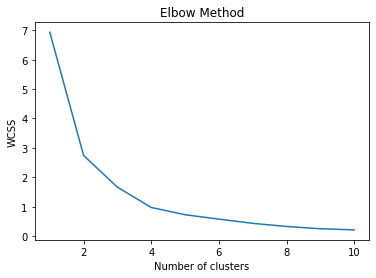

In [17]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_tweets[['likes_pre','retweets_pre']])
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [0]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
df_tweets['cluster'] = kmeans.fit_predict(df_tweets[['likes_pre','retweets_pre']])


In [20]:
df_tweets['cluster'].unique()

array([0, 2, 1, 3])

In [21]:
df_tweets.groupby('cluster')[['likes','retweets']].mean()

,likes,retweets
cluster,,
0,1.868193,0.522525
1,9514.000000,2312.000000
2,1896.206897,520.241379
3,3347.500000,5007.000000


# Sentiment Analysis by Cluster

In [22]:
pip install vaderSentiment

     |████████████████████████████████| 133kB 2.6MB/s 


In [0]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [0]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))

In [25]:
## Getting the compounded sentiment score

def getsentimentscore(s):
  try:
    score = analyser.polarity_scores(s)
    return score['compound']   
  except:
    return 0

df_tweets['sentiment_compounded'] = df_tweets['text'].map(getsentimentscore)
df_tweets.shape

(88914, 27)

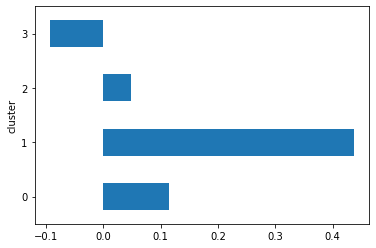

In [26]:
df_tweets.groupby('cluster')['sentiment_compounded'].agg('mean').plot(kind='barh')

In [0]:
df_after_news = df_tweets[df_tweets['date']>'2019-10-28']
df_before_news = df_tweets[df_tweets['date']<='2019-10-28']

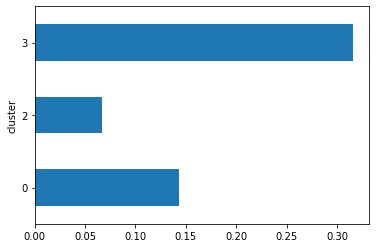

In [31]:
df_before_news.groupby('cluster')['sentiment_compounded'].agg('mean').plot(kind='barh')

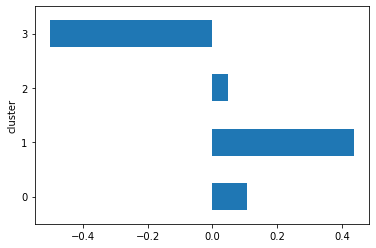

In [32]:
df_after_news.groupby('cluster')['sentiment_compounded'].agg('mean').plot(kind='barh')

In [33]:
df_before_news['sentiment_compounded'].agg('mean')

0.14303133449829916

In [34]:
df_after_news['sentiment_compounded'].agg('mean')

0.10577828281324714